In [1]:
import csv
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 100

## Why Plots?

In [3]:
!wget https://www.openintro.org/data/csv/datasaurus.csv

zsh:1: command not found: wget


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

particle_data = pd.read_csv('data/datasaurus.csv')

stats = pd.DataFrame(columns=['Mean of X', 'Mean of Y', 'Scatter in X', 'Scatter in Y', 'Correlation'])
for i, dataset in enumerate(set(particle_data['dataset'])):
    d = particle_data[particle_data['dataset'] == dataset]
    stats.loc[i + 1] = [d['x'].mean(), d['y'].mean(), d['x'].std(), d['y'].std(), d['x'].corr(d['y'])]

print(stats)

    Mean of X  Mean of Y  Scatter in X  Scatter in Y  Correlation
1   54.261442  47.830252     16.765898     26.939876    -0.061715
2   54.263273  47.832253     16.765142     26.935403    -0.064472
3   54.267341  47.839545     16.768959     26.930275    -0.062961
4   54.260150  47.839717     16.769958     26.930002    -0.065583
5   54.260303  47.839829     16.767735     26.930192    -0.060341
6   54.265882  47.831496     16.768853     26.938608    -0.068609
7   54.268805  47.835450     16.766704     26.939998    -0.068504
8   54.267320  47.837717     16.760013     26.930036    -0.068343
9   54.267849  47.835896     16.766759     26.936105    -0.068980
10  54.266100  47.834721     16.769825     26.939743    -0.064128
11  54.268730  47.830823     16.769239     26.935727    -0.068586
12  54.269927  47.836988     16.769959     26.937684    -0.069446
13  54.266916  47.831602     16.770000     26.937902    -0.066575


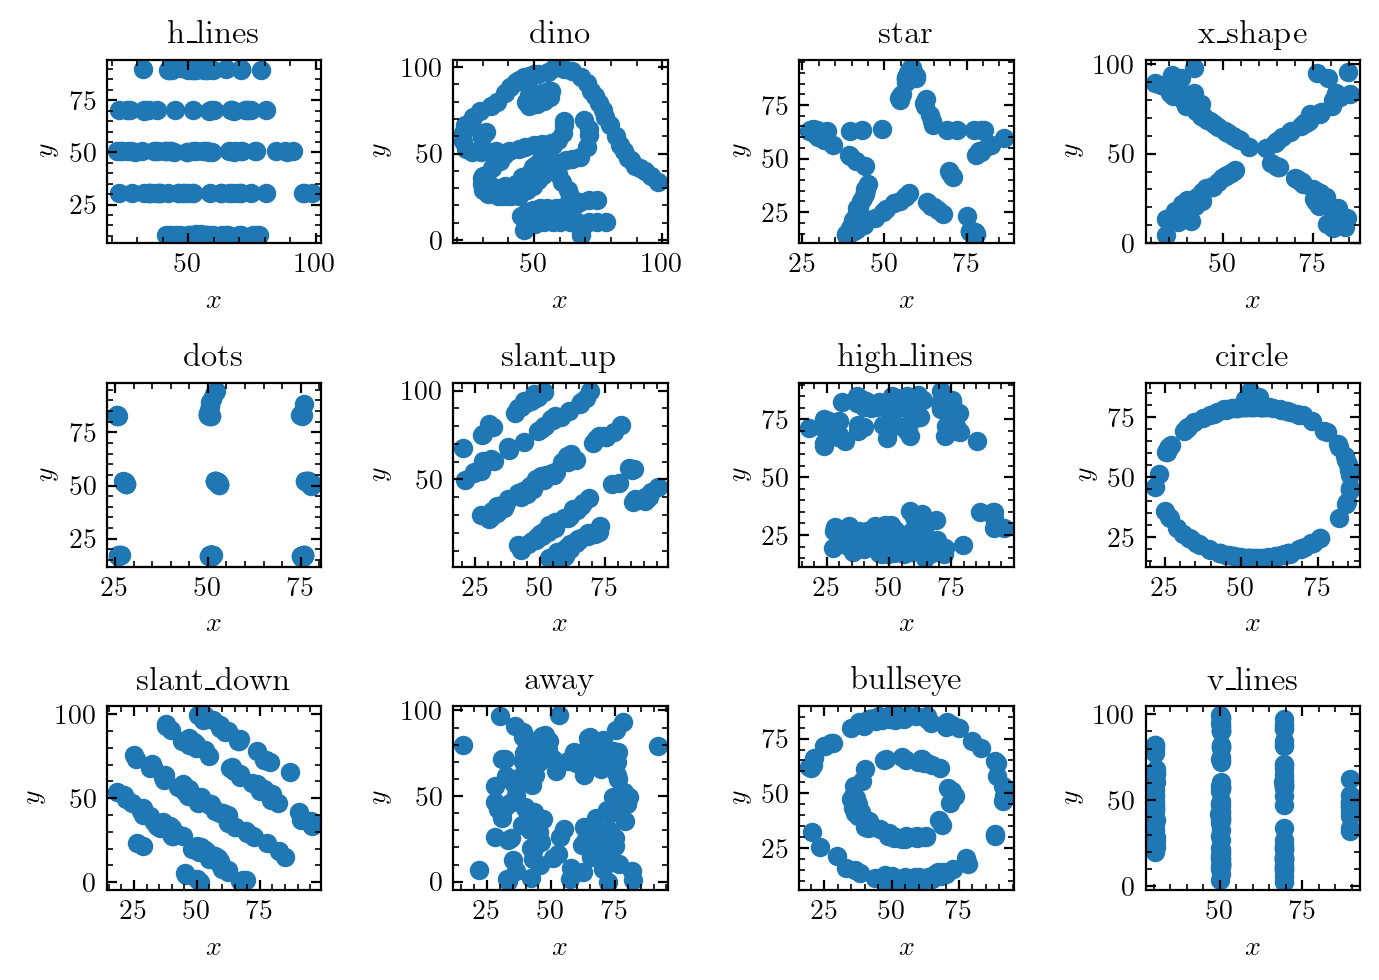

In [4]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(7, 5))
for ax, dataset in zip(axs.flatten(), set(particle_data['dataset'])):
    use = particle_data['dataset'] == dataset
    ax.scatter(particle_data['x'][use], particle_data['y'][use])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(dataset)
plt.tight_layout()

## Example: 2D Line Plots

Text(0.5, 1.0, 'Convergence to the Mean')

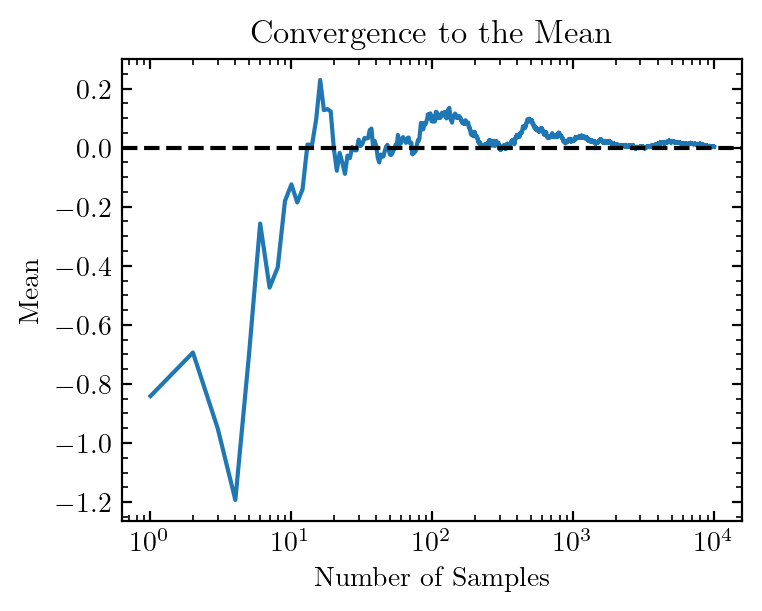

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Let's study the running mean of a normal distribution.
y = np.random.normal(size=10000)
y = np.array([np.mean(y[:i]) for i in range(1, len(y) + 1)])
x = np.arange(1, len(y) + 1)
plt.plot(x, y)
plt.axhline(0, ls='--', color='black')
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Mean')
plt.title('Convergence to the Mean')

## Example: Scatter Plot

In [6]:
!wget https://github.com/astronexus/HYG-Database/raw/refs/heads/main/hyg/CURRENT/hygdata_v41.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/astronexus/]87hygdata_v41.csv        0% [<=>                           ]       0          B/s87HTTP response 302  [https://github.com/astronexus/HYG-Database/raw/refs/heads/main/hyg/CURRENT/hygdata_v41.csv]
87hygdata_v41.csv        0% [ <=>                          ]       0          B/s87Adding URL: https://raw.githubusercontent.com/astronexus/HYG-Database/refs/heads/main/hyg/CURRENT/hygdata_v41.csv
87Adding URL: https://raw.githubusercontent.com/astronexus/HYG-Database/refs/heads/main/hyg/CURRENT/hygdata_v41.csv
87[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]87Saving 'hygdata_v41.csv.2'
87hygdata_v41.csv.2    100% [=============================>]   13.00M    --.-KB/s87HTTP response 200  [https://raw.githubusercontent.com/astronexus/HYG-Database/refs/heads/main/hyg/CURRENT/hygdata_v41.csv]
87hygdata_v41.csv.2    100% [=============================>]   13.00M    --.-KB/s87[Files: 1 

Text(0.5, 1.0, 'HR Diagram')

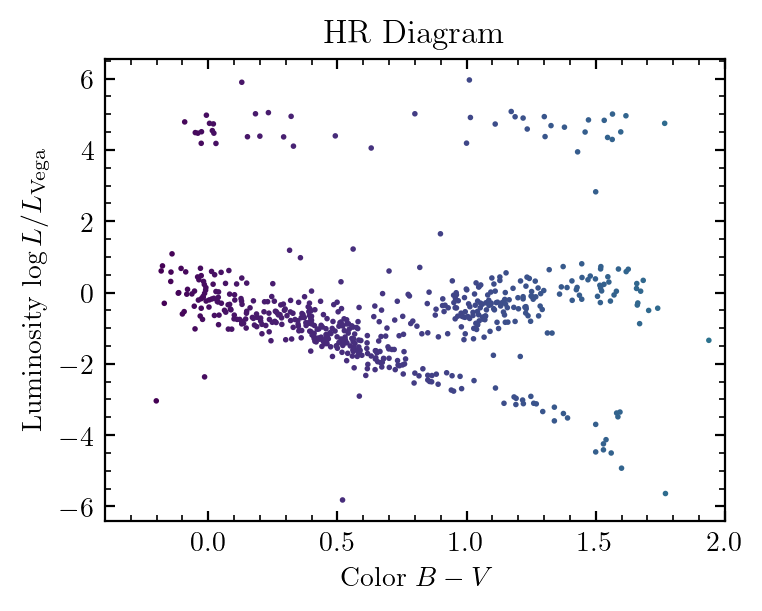

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

particle_data = pd.read_csv('hygdata_v41.csv')[::200]

plt.scatter(particle_data['ci'], -0.4 * particle_data['absmag'], s=1, c=particle_data['ci'])
plt.xlim(-0.4, 2.0)
plt.xlabel('Color $B-V$')
plt.ylabel('Luminosity $\log L / L_\mathrm{Vega}$')
plt.title('HR Diagram')

## Example: 1D Histogram

Text(0.5, 1.0, 'Poisson Distribution')

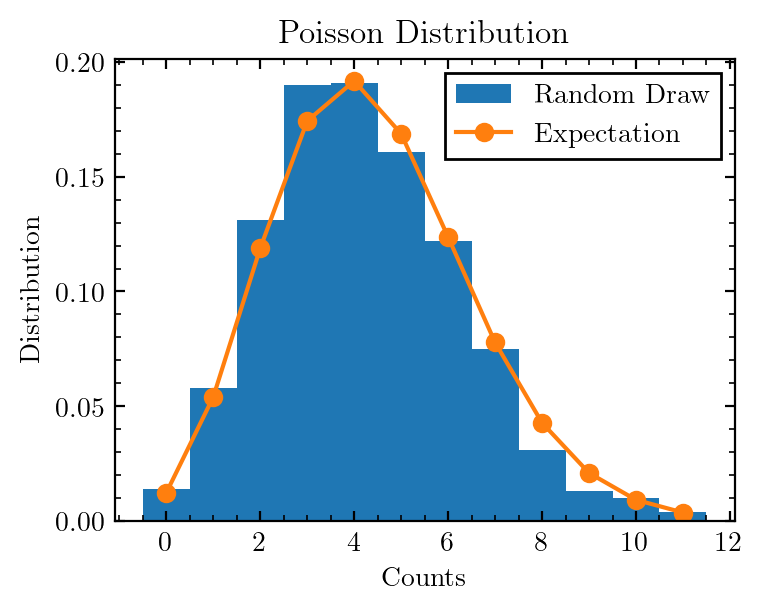

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import factorial

lam = 4.4
c = np.random.poisson(lam=lam, size=1000)
bins = np.arange(-0.5, np.amax(c) + 1, 1.0)
plt.hist(c, bins=bins, density=True, label='Random Draw')

# Plot the theoretical expectation, too.
c = 0.5 * (bins[1:] + bins[:-1])
plt.plot(c, lam**c / factorial(c) * np.exp(-lam), marker='o', label='Expectation')

plt.legend()
plt.xlabel(r'Counts')
plt.ylabel(r'Distribution')
plt.title('Poisson Distribution')

## Example: 2D Histogram

Text(0.5, 1.0, 'HR Diagram')

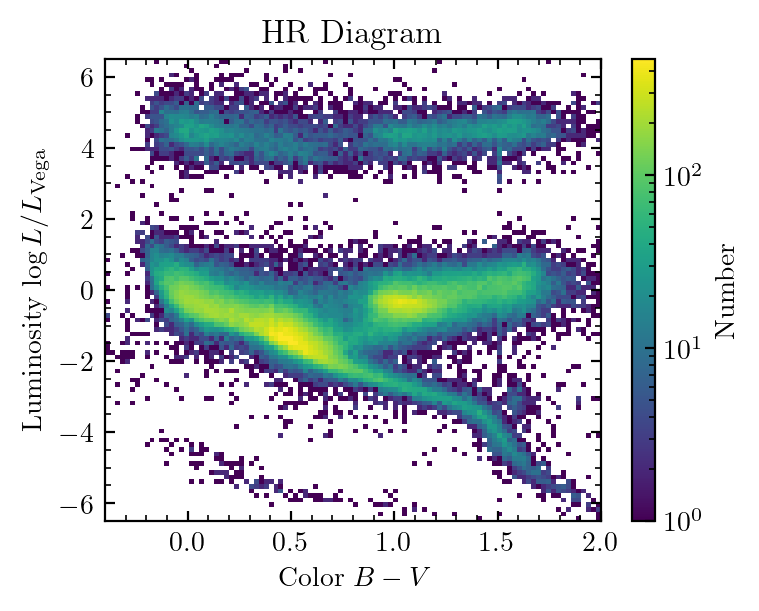

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import LogNorm

particle_data = pd.read_csv('hygdata_v41.csv')

plt.hist2d(particle_data['ci'], -0.4 * particle_data['absmag'], norm=LogNorm(),
           bins=[np.linspace(-0.4, 2.0, 101), np.linspace(-6.5, +6.5, 101)])
plt.colorbar(label='Number')
plt.xlabel(r'Color $B-V$')
plt.ylabel(r'Luminosity $\log L / L_\mathrm{Vega}$')
plt.title('HR Diagram')

## Example: Heat Maps

Text(0.5, 1.0, 'Two-Dimensional Normal')

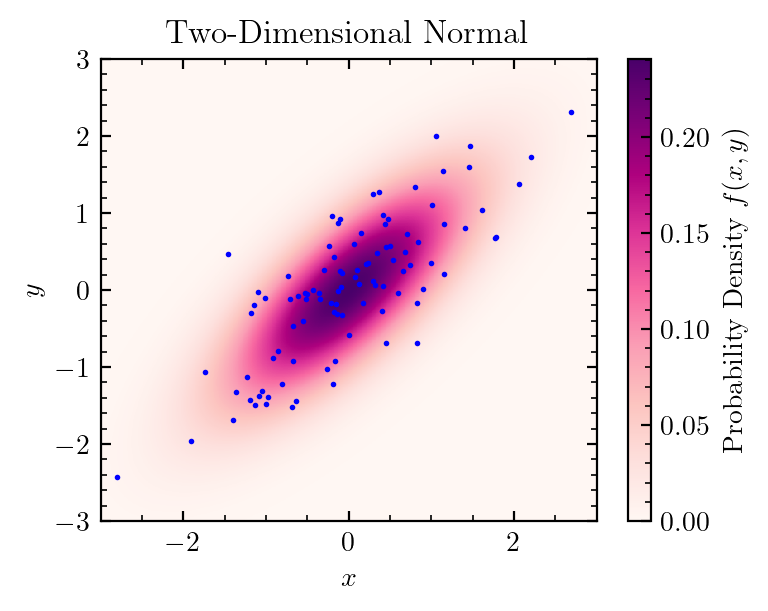

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

dist = multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]])
plt.pcolormesh(x, y, dist.pdf(pos), zorder=-1, cmap='RdPu')
plt.colorbar(label='Probability Density $f(x, y)$')
plt.scatter(*dist.rvs(size=100).T, zorder=1, s=1, color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-3, +3)
plt.ylim(-3, +3)
plt.title('Two-Dimensional Normal')

Text(0.5, 1.0, 'California Housing Data Set')

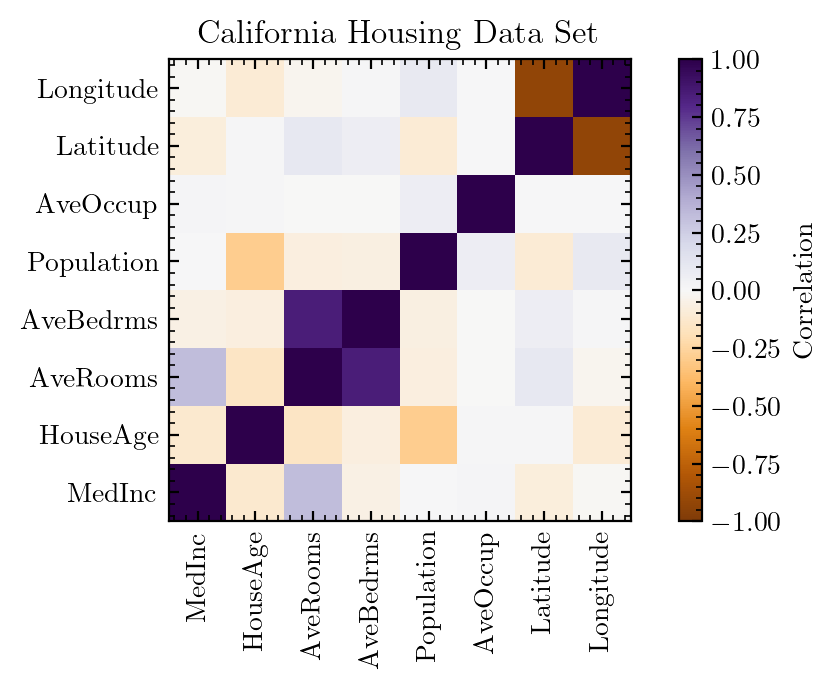

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing

particle_data = fetch_california_housing()
particle_data = pd.DataFrame(particle_data.data, columns=particle_data.feature_names)
corr = particle_data.corr()

plt.pcolormesh(corr, cmap='PuOr', vmin=-1, vmax=+1)
plt.colorbar(label='Correlation')
plt.axis('square')
plt.xticks(np.arange(len(particle_data.columns)) + 0.5, particle_data.columns, rotation=90)
plt.yticks(np.arange(len(particle_data.columns)) + 0.5, particle_data.columns)
plt.title('California Housing Data Set')

# Exercise: Analzying a Supercomputer Simulation of the Universe

For this exercise, we will analyze results from a large computer simulation, the so-called [Illustris TNG simulation](https://www.tng-project.org/). The TNG simulation is a state-of-the-art simulation of the Universe and tracers the evolution of dark matter and galaxies over time.

Don't worry if you're not familiar with astrophysics. The focus of the exercise is data analysis, not testing your physics knowledge. For the purpose of this exercise, it is only important to know that galaxies live in large clumps of dark matter, so-called dark matter halos. Additionally, galaxies come in two types: so-called centrals that live in the center of these halos (like the Milky Way) and so-called satellites that live in the outskirts (such as the Large Magellanic Cloud).

I'm providing you with the following data.

File: `tng_galaxies.csv`

This file contains a subset of galaxies in TNG.

| Field | Description | Unit |
| --- |--- | --- |
| `x`, `y`, `z` | galaxy 3-dimensional position | $h^{-1} \, \mathrm{Mpc}$ |
| `vx`, `vy`, `vz` | galaxy 3-dimensional velocity | $\mathrm{km} / \mathrm{s}$ |
| `mstar` | galaxy stellar mass | $M_\odot$ |
| `sfr` | galaxy star-formation rate | $M_\odot / \mathrm{yr}$ |
| `type` | galaxy central or satellite | — |
| `halo_rhalf` | host halo half-mass radius | $h^{-1} \, \mathrm{Mpc}$ |
| `halo_vmax` | host halo maximum circular velocity | $\mathrm{km} / \mathrm{s}$ |
| `halo_spin` | host halo dimensionless spin parameter | — |
| `halo_sigma` | host halo particle velocity dispersion | $\mathrm{km} / \mathrm{s}$ |
| `halo_mtot` | host halo mass in main and subhalos | $h^{-1} \, M_\odot$ |

File: `tng_particles.csv`

This file contains a subset of particles in TNG.

| Field | Description | Unit |
| --- |--- | --- |
| `x`, `y`, `z` | 3-dimensional position | $h^{-1} \, \mathrm{Mpc}$ |

## Part 1: Distribution of Stellar Masses

Visualize the distribution of stellar masses, i.e., make a histogram. Make sure to include proper axis labels and a figure title. Additionally, think about how to best visualize the distribution. For example, the values for the stellar mass span a large range, almost a factor of $1000$.

What does the data tell us about galaxies? For example, the Milky Way has a stellar mass of order $5 \times 10^{10} \, M_\odot$. Are such galaxies common in TNG? What about galaxies ten times more massive than the Milky Way?

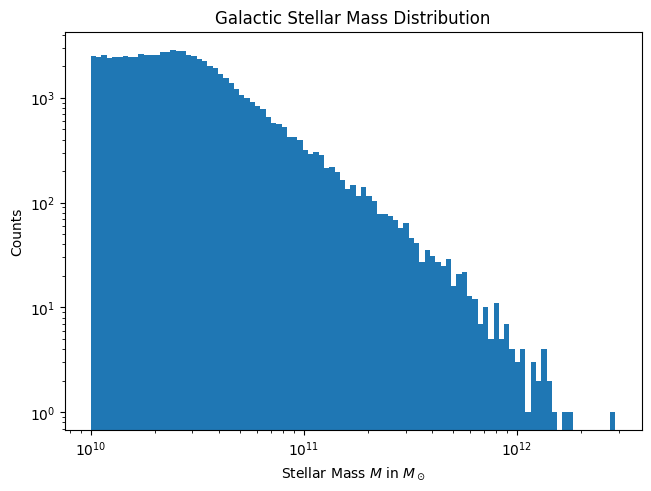

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

particle_data = pd.read_csv('./data/Class_3_galaxies.csv')
mass_list = particle_data['mstar']

fig, ax = plt.subplots(layout='constrained')

plt.xlabel(r"Stellar Mass $M$ in $M_\odot$")
plt.ylabel("Counts")
plt.title("Galactic Stellar Mass Distribution")

ax.set_yscale('log')
ax.set_xscale('log')
plt.hist(mass_list, bins = np.geomspace(min(mass_list), max(mass_list), 100))
plt.show()

## Part 2: Relation between Stellar Mass and Halo Mass

Visualize the relation between the stellar mass of a **central** galaxy and the host halo mass by creating a two-dimensional histogram.

Bonus: Overplot the median halo mass at a given stellar mass.

Is there a strong relation between the two quantities? Does every galaxy with the same stellar mass have the same host halo mass? Based on your plot and knowing that the Milky Way's stellar mass is $\sim 5 \times 10^{10} \, M_\odot$, what do you expect the mass of its dark matter halo to be?

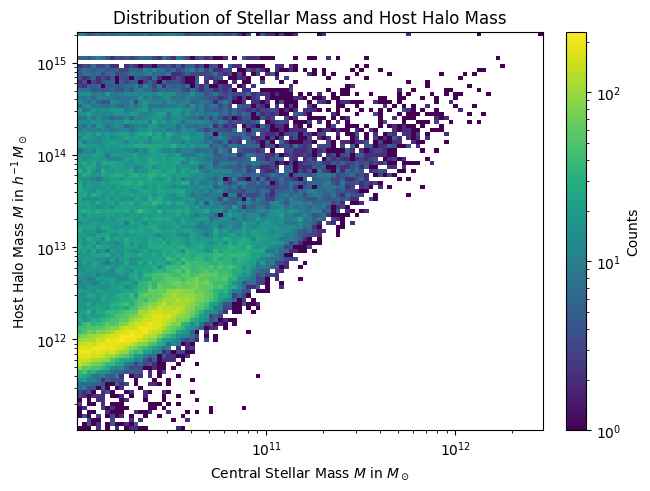

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

particle_data = pd.read_csv('./data/Class_3_galaxies.csv')
central_mass_list = particle_data['mstar']
halo_mass_list = particle_data['halo_mtot']

fig, ax = plt.subplots(layout='constrained')

ax.set_yscale('log')
ax.set_xscale('log')
x_bins = np.geomspace(min(central_mass_list), max(central_mass_list), 100)
y_bins = np.geomspace(min(halo_mass_list), max(halo_mass_list), 100)

plt.title('Distribution of Stellar Mass and Host Halo Mass')
plt.xlabel(r"Central Stellar Mass $M$ in $M_\odot$")
plt.ylabel(r"Host Halo Mass $M$ in $h^{-1} \, M_\odot$")

plt.hist2d(central_mass_list, halo_mass_list, norm=LogNorm(), bins = (x_bins, y_bins))
colorbar = plt.colorbar(label = 'Counts')
plt.show()

## Part 3: Distribution of Matter

On the largest scales, the distribution of matter and galaxies looks like a "cosmic web."

(a) Plot the $x$ and $y$ distribution of particles, i.e. matter, in a slice of the simulation volume, i.e., those with $z < 10 \, h^{-1} \, \mathrm{Mpc}$.

(b) Overplot the distribution of massive galaxies, $m_\star > 10^{11} \, M_\odot$, in the same slice.

(c) Does the distribution of galaxies trace that of dark matter?

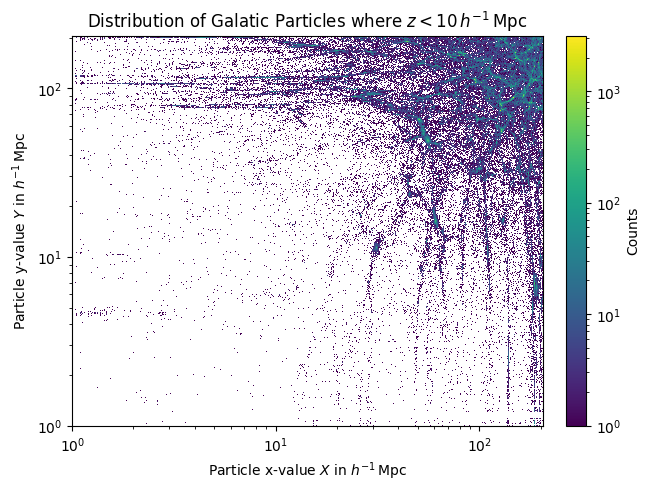

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# plot particle data
particle_data = pd.read_csv('./data/Class_3_particles.csv')
px_list = particle_data['x']
py_list = particle_data['y']
pz_list = particle_data['z']

pz_slice = pz_list < 10
slice_px = px_list[pz_slice]
slice_py = py_list[pz_slice]

fig, ax = plt.subplots(layout='constrained')

ax.set_yscale('log')
ax.set_xscale('log')

x_bins = np.geomspace(1, max(slice_px), 1000)
y_bins = np.geomspace(1, max(slice_py), 1000)

plt.title(r'Distribution of Galatic Particles where $z < 10 \, h^{-1} \, \mathrm{Mpc}$')
plt.xlabel(r'Particle x-value $X$ in $h^{-1} \, \mathrm{Mpc}$')
plt.ylabel(r'Particle y-value $Y$ in $h^{-1} \, \mathrm{Mpc}$')

plt.hist2d(slice_px, slice_py, norm=LogNorm(), bins = (x_bins, y_bins))
colorbar = plt.colorbar(label = 'Counts')
plt.show()

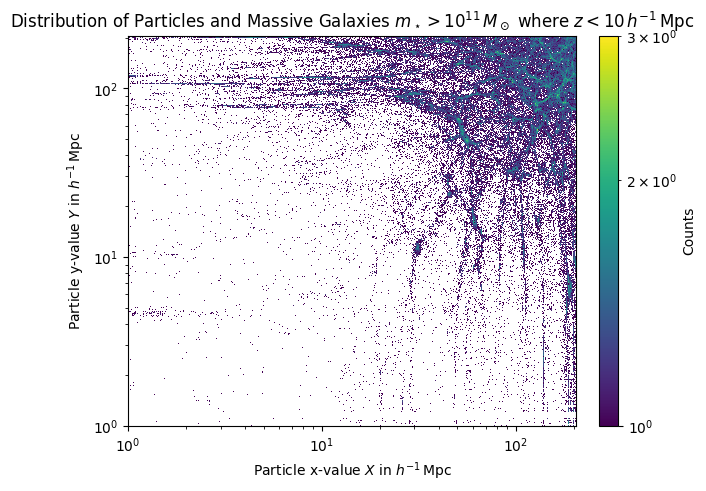

In [83]:
# particle data
particle_data = pd.read_csv('./data/Class_3_particles.csv')
px_list = particle_data['x']
py_list = particle_data['y']
pz_list = particle_data['z']

pz_slice = pz_list < 10
slice_px = px_list[pz_slice]
slice_py = py_list[pz_slice]

# galaxy data
galaxy_data = pd.read_csv('./data/Class_3_galaxies.csv')
gx_list = galaxy_data['x']
gy_list = galaxy_data['y']
gz_list = galaxy_data['z']
gm_list = galaxy_data['mstar']

big_m = gm_list > pow(10, 11)
slice_gz = gz_list < 10
big_slice_gx = (gx_list[big_m])[slice_gz]
big_slice_gy = (gy_list[big_m])[slice_gz]

fig, ax = plt.subplots(layout='constrained')

x_bins = np.geomspace(1, max(max(px_list), max(gx_list)), 1000)
y_bins = np.geomspace(1, max(max(py_list), max(gy_list)), 1000)

ax.set_xscale('log')
ax.set_yscale('log')

plt.title(r'Distribution of Particles and Massive Galaxies $m_\star > 10^{11} \, M_\odot$ where $z < 10 \, h^{-1} \, \mathrm{Mpc}$')
plt.xlabel(r'Particle x-value $X$ in $h^{-1} \, \mathrm{Mpc}$')
plt.ylabel(r'Particle y-value $Y$ in $h^{-1} \, \mathrm{Mpc}$')

plt.hist2d(slice_px, slice_py, norm=LogNorm(), bins = (x_bins, y_bins))
plt.hist2d(big_slice_gx, big_slice_gy, norm=LogNorm(), bins = (x_bins, y_bins))
plt.colorbar(label = 'Counts')
plt.show()